### IMPORT REQUIRED PACKAGES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance

### IMPORT SAMPLE DATA

In [2]:
data_for_model = pd.read_csv("finaldata.csv")

In [3]:
# Drop necessary columns

data_for_model.drop(["url", "population", "area", "travelers_2019",
                     "covid_total", "covid_active", "longitude", "latitude"], axis = 1, inplace = True)

In [4]:
# Shuffle data

data_for_model = shuffle(data_for_model, random_state = 42)

### DEAL WITH MISSING VALUES

In [5]:
data_for_model.isna().sum()

rating                 5005
guests                    0
number_of_beds            0
number_of_bedrooms        0
number_of_bathrooms       0
                       ... 
entire_place              0
entire_resort             0
entire_villa              0
farm_stay                 0
island                    0
Length: 197, dtype: int64

In [6]:
data_for_model.dropna(how = "any", inplace = True)

### SPLIT INPUT VARIABLES & OUTPUT VARIABLES

In [7]:
X = data_for_model.drop(["price_per_night"], axis = 1)
y = data_for_model["price_per_night"]

### SPLIT OUT TRAINING & TEST SETS

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### MODEL TRAINING

In [9]:
regressor = RandomForestRegressor(random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### MODEL ASSESSMENT

In [10]:
# Predict on the Test Set

y_pred = regressor.predict(X_test)

In [11]:
# Calculate R-Squared

r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.6429158182653629


In [12]:
# Cross Validation (CV)

cv = KFold(n_splits = 4, shuffle = True, random_state = 42)
cv_scores = cross_val_score(regressor, X_train, y_train, cv = cv, scoring = "r2")
cv_scores.mean()

0.5703954907020848

In [13]:
# Calculate Adjusted R-Squared

num_data_points, num_input_vars = X_test.shape
adjusted_r_squared = 1 - (1 - r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars - 1)
print(adjusted_r_squared)

0.5780515924822407


### FEATURE IMPORTANCE

In [14]:
feature_importance = pd.DataFrame(regressor.feature_importances_)
feature_names = pd.DataFrame(X.columns)
feature_importance_summary = pd.concat([feature_names, feature_importance], axis = 1)
feature_importance_summary.columns = ["input_variable", "feature_importance"]
feature_importance_summary.sort_values(by = "feature_importance", inplace = True)

<AxesSubplot:xlabel='feature_importance', ylabel='input_variable'>

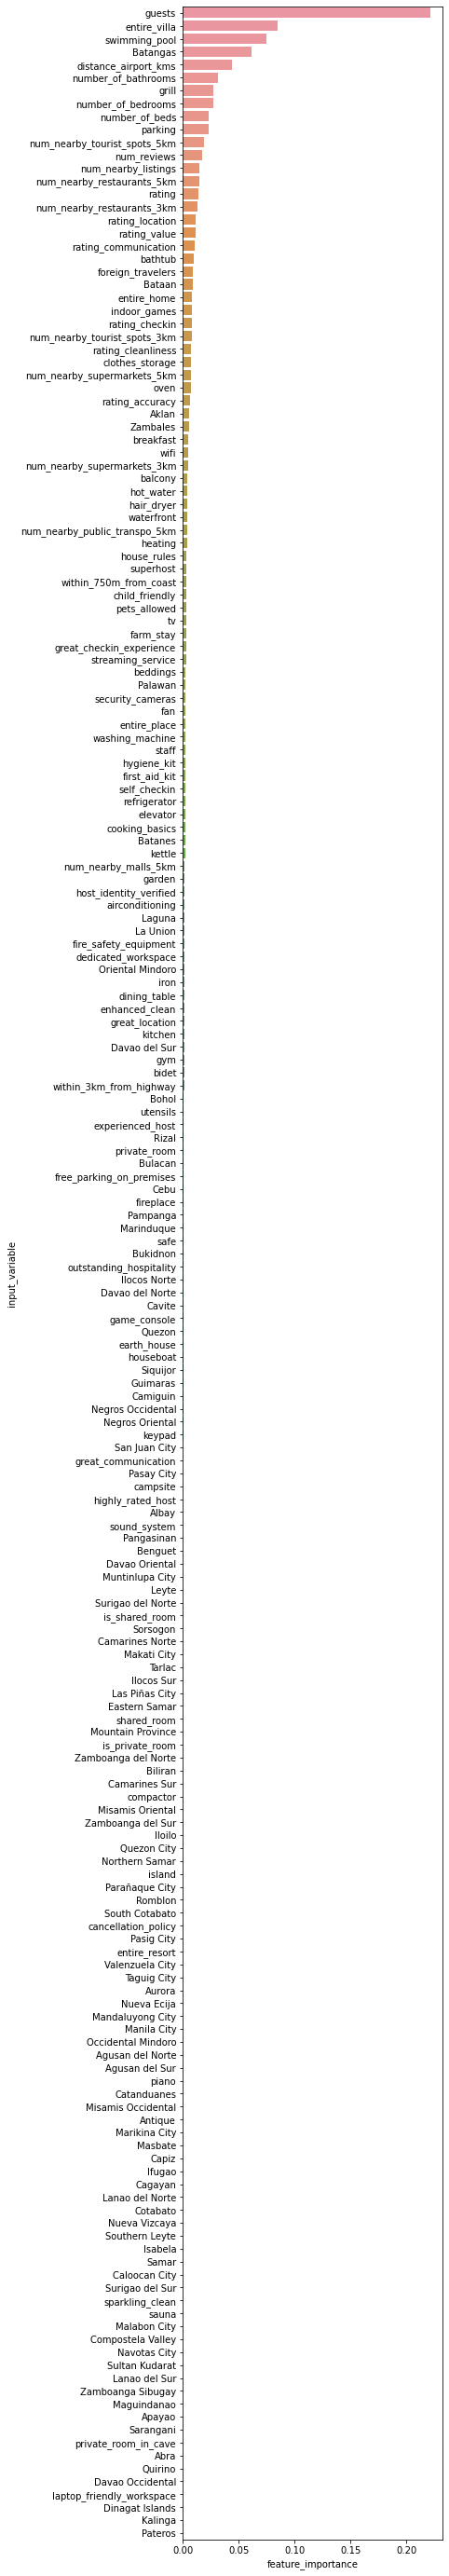

In [15]:
# Set the figure size
plt.figure(figsize=(5, 50))

feature_importance_summary = feature_importance_summary.sort_values(['feature_importance'], ascending=False).reset_index(drop=True)

# plot a bar chart
sns.barplot(
    y=feature_importance_summary["input_variable"], 
    x=feature_importance_summary["feature_importance"], 
    data=feature_importance_summary)

### PERMUTATION IMPORTANCE

In [16]:
result = permutation_importance(regressor, X_test, y_test, n_repeats = 10, random_state = 42)
result

{'importances_mean': array([-3.82332664e-04,  3.49928942e-01,  5.19853490e-03,  1.61551501e-02,
         2.68393129e-02,  9.86364275e-04,  8.60740875e-04, -4.72150001e-04,
         3.19605469e-03,  7.52462504e-04,  5.23733675e-03, -2.33054482e-04,
        -6.37600915e-04,  4.17027890e-04, -3.49894082e-04, -1.97064713e-03,
        -4.61741783e-05,  6.08351548e-04,  3.27032736e-03,  2.60175238e-03,
         4.79573405e-04,  4.72076840e-03, -5.08634767e-05, -9.56307131e-04,
        -8.27428100e-09,  2.44489501e-03,  0.00000000e+00, -5.88105037e-03,
        -3.05632368e-04,  2.54603450e-04,  2.15906521e-03,  0.00000000e+00,
         1.28041084e-01,  9.35649359e-05,  1.22755254e-03,  2.72958148e-03,
         1.20236562e-02,  1.19327174e-03,  8.81651147e-04,  3.23265332e-04,
         1.15442054e-04,  5.39555130e-04,  1.25108440e-03,  6.23855513e-05,
         6.14659006e-04, -1.72647034e-04,  6.59944308e-03,  3.13299854e-02,
         1.02342169e-05, -8.17513889e-04,  3.20806949e-03,  5.161913

In [17]:
permutation_importance = pd.DataFrame(result["importances_mean"])
feature_names = pd.DataFrame(X.columns)
permutation_importance_summary = pd.concat([feature_names, permutation_importance], axis = 1)
permutation_importance_summary.columns = ["input_variable", "permutation_importance"]
permutation_importance_summary.sort_values(by = "permutation_importance", inplace = True)

<AxesSubplot:xlabel='permutation_importance', ylabel='input_variable'>

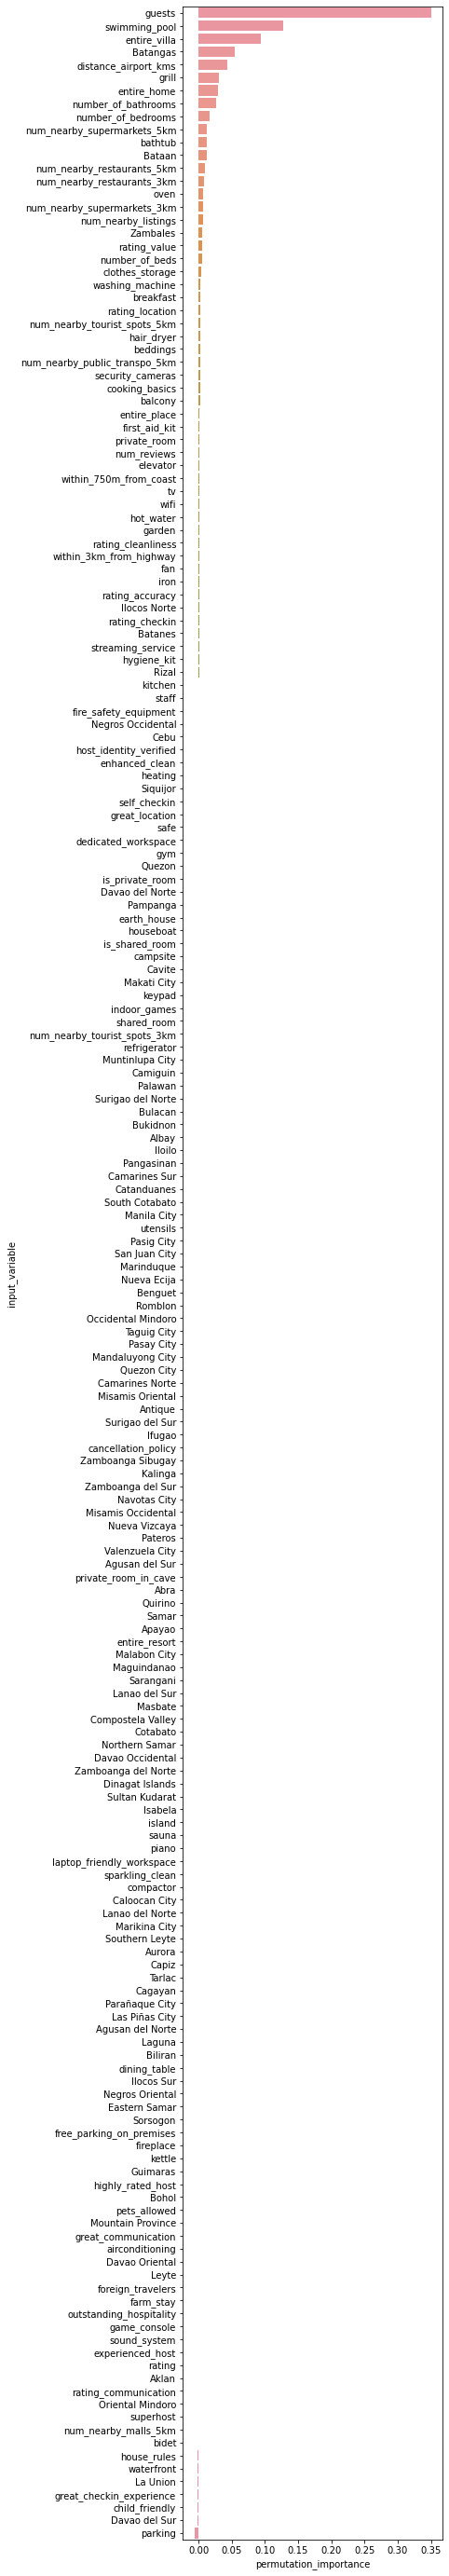

In [18]:
# Set the figure size
plt.figure(figsize=(5, 50))

permutation_importance_summary = permutation_importance_summary.sort_values(['permutation_importance'], ascending=False).reset_index(drop=True)

# plot a bar chart
sns.barplot(
    y=permutation_importance_summary["input_variable"], 
    x=permutation_importance_summary["permutation_importance"], 
    data=permutation_importance_summary)

### PREDICTIONS UNDER THE HOOD

In [19]:
y_pred[0]
new_data = [X_test.iloc[0]]
print(new_data)
regressor.estimators_

[rating                 4.87
guests                 1.00
number_of_beds         1.00
number_of_bedrooms     1.00
number_of_bathrooms    1.00
                       ... 
entire_place           0.00
entire_resort          0.00
entire_villa           0.00
farm_stay              0.00
island                 0.00
Name: 5003, Length: 196, dtype: float64]


[DecisionTreeRegressor(max_features='auto', random_state=1608637542),
 DecisionTreeRegressor(max_features='auto', random_state=1273642419),
 DecisionTreeRegressor(max_features='auto', random_state=1935803228),
 DecisionTreeRegressor(max_features='auto', random_state=787846414),
 DecisionTreeRegressor(max_features='auto', random_state=996406378),
 DecisionTreeRegressor(max_features='auto', random_state=1201263687),
 DecisionTreeRegressor(max_features='auto', random_state=423734972),
 DecisionTreeRegressor(max_features='auto', random_state=415968276),
 DecisionTreeRegressor(max_features='auto', random_state=670094950),
 DecisionTreeRegressor(max_features='auto', random_state=1914837113),
 DecisionTreeRegressor(max_features='auto', random_state=669991378),
 DecisionTreeRegressor(max_features='auto', random_state=429389014),
 DecisionTreeRegressor(max_features='auto', random_state=249467210),
 DecisionTreeRegressor(max_features='auto', random_state=1972458954),
 DecisionTreeRegressor(max_f

In [20]:
predictions = []
tree_count = 0
for tree in regressor.estimators_:
    prediction = tree.predict(new_data)[0]
    predictions.append(prediction)
    tree_count += 1

In [21]:
sum(predictions) / tree_count

980.66